Loading necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


Reading dataset and viewing general information

In [3]:
iris_data = pd.read_excel('iris.xls')

In [4]:
print(iris_data.head())
print(iris_data.info())
print(iris_data.isna().sum())

    SL   SW   PL   PW Classification
0  5.1  3.5  1.4  0.2    Iris-setosa
1  4.9  3.0  1.4  0.2    Iris-setosa
2  NaN  3.2  1.3  0.2    Iris-setosa
3  4.6  3.1  1.5  0.2    Iris-setosa
4  5.0  3.6  1.4  0.2    Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


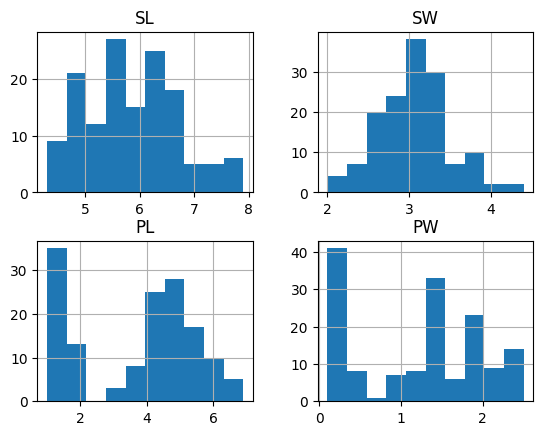

In [5]:
freq_data = iris_data.select_dtypes('float64')
freq_data.hist()
plt.show()

Handling null values

In [6]:
iris_data['SL'] = iris_data['SL'].fillna(iris_data['SL'].mean())#as it's a normalised distribution
iris_data['SW'] = iris_data['SW'].fillna(iris_data['SW'].mean())#as it's a normalised distribution
iris_data['PL'] = iris_data['PL'].fillna(iris_data['PL'].median())#skewed data

In [7]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Label Encoding for 'Classification'

In [8]:
import sklearn.preprocessing as sk
x_le = sk.LabelEncoder()
iris_data['Classification'] = x_le.fit_transform(iris_data['Classification'])

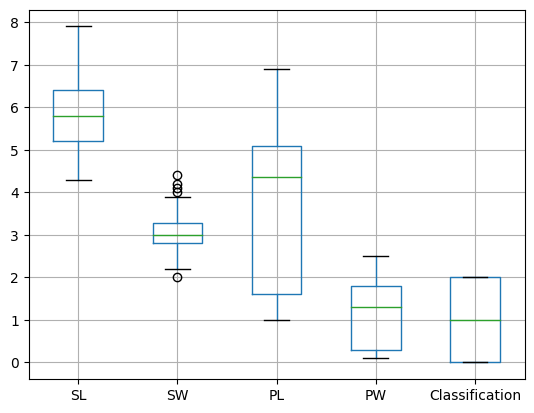

In [9]:
#checking outlier
iris_data.boxplot()
plt.show()

Outlier handling in 'SW'

In [10]:
#handling outliers in SW

q1 = np.percentile(iris_data['SW'], 25, method = 'midpoint')
q3 = np.percentile(iris_data['SW'], 75, method = 'midpoint')
print('q1 for SW: ',q1,'\nq3 for SW: ',q3)
IQR = q3-q1
print('IQR for SW: ',IQR)
low_lim = q1 - 1.5*IQR
up_lim = q3 + 1.5*IQR
print('lower whisker for SW: ', low_lim,'\nupper whisker for SW :', up_lim)

outlier =[]
for x in iris_data['SW']:
  if(x<low_lim or x>up_lim):
    outlier.append(x)
print('Outlier for SW: ',outlier)

q1 for SW:  2.8 
q3 for SW:  3.25
IQR for SW:  0.4500000000000002
lower whisker for SW:  2.1249999999999996 
upper whisker for SW : 3.9250000000000003
Outlier for SW:  [4.0, 4.4, 4.1, 4.2, 2.0]


In [11]:
#data clipping to optimize outliers

iris_data['SW'] = iris_data['SW'].clip(lower = low_lim, upper = up_lim)

Checking correlation

<Axes: >

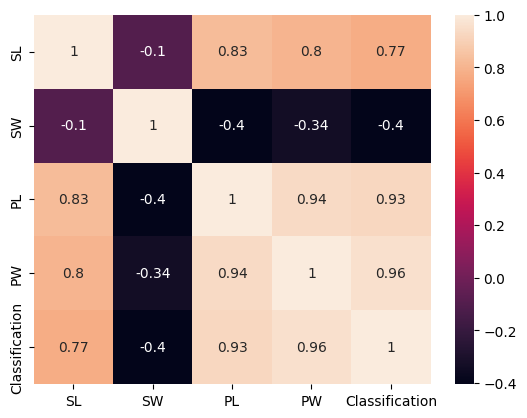

In [12]:
sns.heatmap(iris_data.corr(), annot = True)

In [13]:
#dropping highly correlated columns
iris_data.drop(['PL'], axis = 1, inplace = True)
iris_data.drop(['SL'], axis = 1, inplace = True)

<Axes: >

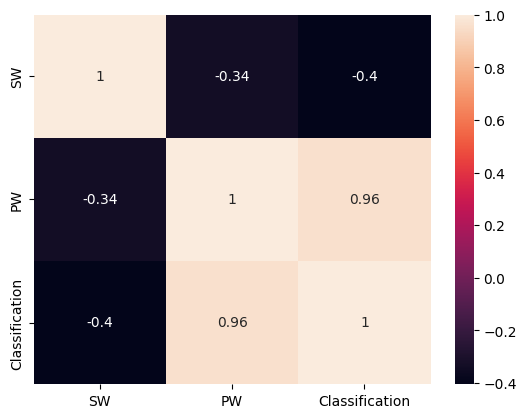

In [14]:
sns.heatmap(iris_data.corr(), annot = True)

Splitting into independent and dependent features

In [15]:
y = iris_data['Classification']
x = iris_data.drop(['Classification'], axis = 1)

Splitting into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = .33)

**Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model = clf.fit(x_train, y_train)
pred_y = model.predict(x_test)

In [18]:
print(confusion_matrix(y_test,pred_y))

[[19  0  0]
 [ 0 13  2]
 [ 0  1 15]]


Defining a function to check various scores for each model

In [19]:
def Score_Comparison(y_test, pred_y):
  print('Accuracy score: ', accuracy_score(y_test,pred_y))
  print('Precision score: ', precision_score(y_test,pred_y, average = 'micro'))
  print('Recall score: ', recall_score(y_test,pred_y, average = 'micro'))
  print('F1 score: ', f1_score(y_test,pred_y, average = 'micro'))

In [20]:
Score_Comparison(y_test, pred_y)

Accuracy score:  0.94
Precision score:  0.94
Recall score:  0.94
F1 score:  0.94


**k-NN**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
metric_k =[]
neighbors = np.arange(3,15)

Checking for best neighbour

In [22]:
for k in neighbors:
  classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski', p =2)
  classifier.fit(x_train, y_train)
  y_pred_knn = classifier.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'Accuracy')

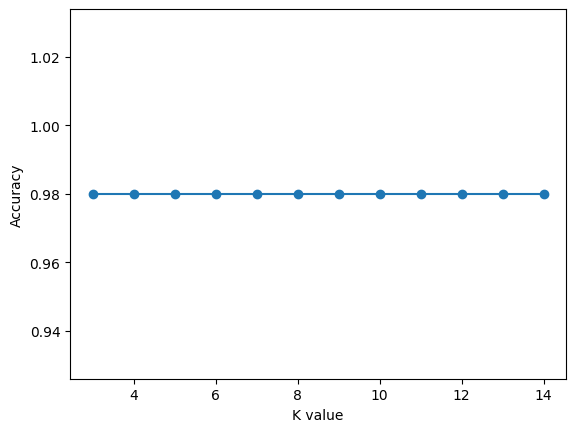

In [23]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [24]:
classifier= KNeighborsClassifier(n_neighbors=8,metric='minkowski', p =2)
classifier.fit(x_train, y_train)
y_pred_knn = classifier.predict(x_test)

Score_Comparison(y_test, y_pred_knn)

Accuracy score:  0.98
Precision score:  0.98
Recall score:  0.98
F1 score:  0.98


**SVM model**

In [25]:
from sklearn.svm import SVC
sv_cl = SVC(kernel='rbf')
sv_cl.fit(x_train,y_train)

SVC()

In [26]:
y_pred_SVM = sv_cl.predict(x_test)

In [27]:
Score_Comparison(y_test, y_pred_SVM)

Accuracy score:  0.98
Precision score:  0.98
Recall score:  0.98
F1 score:  0.98


**Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_cl = DecisionTreeClassifier(random_state =1)
dt_cl.fit(x_train, y_train)
y_pred_dt = dt_cl.predict(x_test)

In [29]:
Score_Comparison(y_test,y_pred_dt)

Accuracy score:  0.88
Precision score:  0.88
Recall score:  0.88
F1 score:  0.88


**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(random_state = 2, n_estimators=20, max_depth = 20, criterion='entropy')
rf_cl.fit(x_train, y_train)
y_pred_rf = rf_cl.predict(x_test)

In [31]:
Score_Comparison(y_test,y_pred_rf)

Accuracy score:  0.92
Precision score:  0.92
Recall score:  0.92
F1 score:  0.92


**Inference**: From above results, we can see that the best model for iris dataset is k-NN and SVM as they gave the highest accuracy score